[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arpm92/IAH_IA-Base/blob/main/clonacion_de_voz.ipynb)


In [1]:
!apt-get install -y locales
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
locales is already the newest version (2.35-0ubuntu3.8).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Generating locales (this might take a while)...
  en_US.UTF-8... done
Generation complete.


# Instalación de los paquetes

In [2]:
!pip3 install -U scipy

!git clone https://github.com/jnordberg/tortoise-tts.git
%cd tortoise-tts
!pip3 install -r requirements.txt
!pip3 install transformers==4.19.0 einops==0.5.0 rotary_embedding_torch==0.1.5 unidecode==1.3.5
!python3 setup.py install

import torch
import torchaudio
import torch.nn as nn
import torch.nn.functional as F

import IPython

from tortoise.api import TextToSpeech
from tortoise.utils.audio import load_audio, load_voice, load_voices

tts = TextToSpeech()

import os
from google.colab import files

fatal: destination path 'tortoise-tts' already exists and is not an empty directory.
/content/tortoise-tts
  Using cached numba-0.48.0.tar.gz (2.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached ffmpeg-1.4-py3-none-any.whl
  Using cached llvmlite-0.31.0.tar.gz (110 kB)
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of librosa to determine which version is compatible with other requirements. This could take a while.
  Using cached librosa-0.10.2-py3-none-any.whl.metadata (8.6 kB)
  Using cached librosa-0.10.1-py3-none-any.whl.metadata (8.3 kB)
  Using cached librosa-0.10.0.post2-py3-none-any.whl.metadata (8.3 kB)
  Using cached librosa-0.10.0.post1-py3-none-any.whl.metadata (8.3 kB)
  Using cached librosa-0.10.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached librosa-0.9.2-py3-none-any.whl.metadata (8.2 kB)
  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
INFO: pip is looking at multiple versions of resampy to determine wh

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:392: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

# Editar la salida de salida 'texto' y 'preajuste' y luego ejecutar

In [3]:
!pip install pydub
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
import os
from pydub import AudioSegment
from math import ceil

# Ruta donde se guardarán los archivos de voz personalizados
CUSTOM_VOICE_NAME = "AP_ES"
custom_voice_folder = f"tortoise/voices/{CUSTOM_VOICE_NAME}"
os.makedirs(custom_voice_folder, exist_ok=True)


In [5]:
# Upload multiples archivos .wav
print("Please upload the .wav files.")
uploaded_files = files.upload()  # Upload de varios archivos


Please upload the .wav files.


Saving AP_ES_historia.wav to AP_ES_historia (2).wav


In [6]:
# Procesar cada archivo cargado
file_index = 0  # Índice para seguir la pista de los archivos de trozos
for file_name, file_data in uploaded_files.items():
    # Cargar el archivo de audio con pydub
    audio = AudioSegment.from_wav(file_name)

    # Definir la longitud del trozo en milisegundos (6 segundos = 6000 milisegundos)
    chunk_length_ms = 6000

    # Calcular el número de trozos
    n_chunks = ceil(len(audio) / chunk_length_ms)

    # Divide el audio en trozos y guarda cada uno de ellos como un archivo .wav independiente.
    for i in range(n_chunks):
        start_time = i * chunk_length_ms
        end_time = start_time + chunk_length_ms
        chunk = audio[start_time:end_time]

        # Guarda el trozo como un archivo .wav separado con un nombre único
        chunk_file_path = os.path.join(custom_voice_folder, f'{file_index}.wav')
        chunk.export(chunk_file_path, format="wav")
        print(f"Saved {chunk_file_path}")

        # Incrementar file_index para un nombre único en todos los ficheros
        file_index += 1

print(f"All audio files split into chunks and saved in {custom_voice_folder}.")

Saved tortoise/voices/AP_ES/0.wav
Saved tortoise/voices/AP_ES/1.wav
Saved tortoise/voices/AP_ES/2.wav
Saved tortoise/voices/AP_ES/3.wav
Saved tortoise/voices/AP_ES/4.wav
Saved tortoise/voices/AP_ES/5.wav
Saved tortoise/voices/AP_ES/6.wav
Saved tortoise/voices/AP_ES/7.wav
Saved tortoise/voices/AP_ES/8.wav
Saved tortoise/voices/AP_ES/9.wav
Saved tortoise/voices/AP_ES/10.wav
All audio files split into chunks and saved in tortoise/voices/AP_ES.


In [7]:
# Crear la carpeta 'output' si no existe
os.makedirs('/content/output', exist_ok=True)

In [8]:
# Elige un «modo predefinido» para determinar la calidad. Opciones: {«ultra_fast», «fast» (por defecto), «standard», «high_quality»}. Ver documentación en api.py
preset = "high_quality"

In [12]:
# Este es el texto que se pronunciará.
text = "Español: Vamos a probar como funciona la clonación de voz de alta calidad. English: We are going to try how the high quality voice cloning works."

In [10]:
# Generar discurso
voice_samples, conditioning_latents = load_voice(CUSTOM_VOICE_NAME)
gen = tts.tts_with_preset(text, voice_samples=voice_samples, conditioning_latents=conditioning_latents,
                          preset=preset, temperature=0.1)

output_file_path = (f'/content/output/generated-high_quality-{CUSTOM_VOICE_NAME}.wav')
torchaudio.save(output_file_path, gen.squeeze(0).cpu(), 24000)
IPython.display.Audio(f'generated-{CUSTOM_VOICE_NAME}.wav')

/content/tortoise-tts/tortoise/models/arch_util.py:310: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mel_norms = torch.load(self.mel_norm_file)


Generating autoregressive samples..


100%|██████████| 16/16 [03:38<00:00, 13.69s/it]


Computing best candidates using CLVP and CVVP


  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:92: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
100%|██████████| 16/16 [01:10<00:00,  4.40s/it]


Transforming autoregressive outputs into audio..


100%|██████████| 400/400 [04:56<00:00,  1.35it/s]


In [11]:
# Elige un «modo predefinido» para determinar la calidad. Opciones: {«ultra_fast», «fast» (por defecto), «standard», «high_quality»}. Ver documentación en api.py
preset = "ultra_fast"

# Este es el texto que se pronunciará.
text = "Español: Vamos a probar como funciona la clonación de voz ultra rápida. English: We are going to try how the ultra fast voice cloning works."

# Generar discurso
voice_samples, conditioning_latents = load_voice(CUSTOM_VOICE_NAME)
gen = tts.tts_with_preset(text, voice_samples=voice_samples, conditioning_latents=conditioning_latents,
                          preset=preset, temperature=0.1)

output_file_path = (f'/content/output/generated-ultra_fast-{CUSTOM_VOICE_NAME}.wav')
torchaudio.save(output_file_path, gen.squeeze(0).cpu(), 24000)
IPython.display.Audio(f'generated-{CUSTOM_VOICE_NAME}.wav')

Generating autoregressive samples..


100%|██████████| 1/1 [00:11<00:00, 11.23s/it]


Computing best candidates using CLVP and CVVP


100%|██████████| 1/1 [00:04<00:00,  4.15s/it]


Transforming autoregressive outputs into audio..


100%|██████████| 30/30 [00:10<00:00,  2.87it/s]


# Visualización del audio

In [13]:
!pip install matplotlib


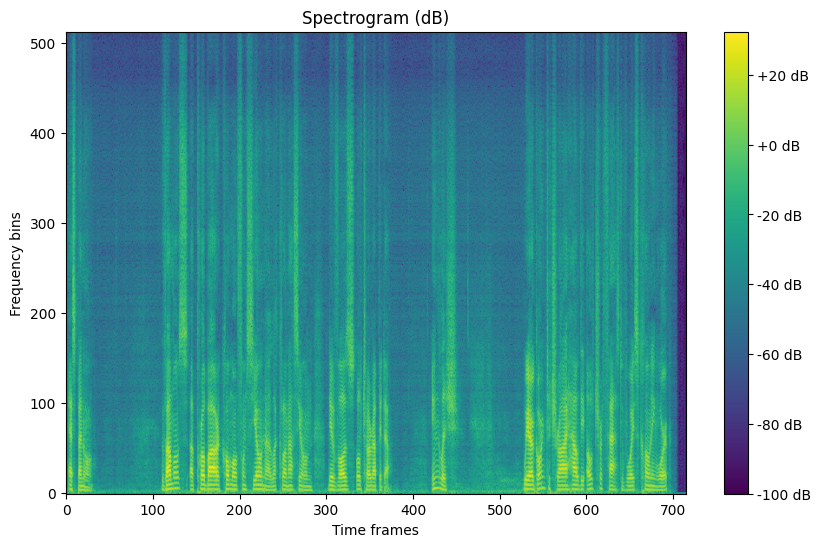

In [14]:
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt

def plot_spectrogram(waveform, sample_rate):
    # Generate the spectrogram
    spectrogram_transform = T.Spectrogram(n_fft=1024, hop_length=None, power=2.0)
    spectrogram = spectrogram_transform(waveform)

    # Convert to decibels for better visualization
    spectrogram_db = T.AmplitudeToDB()(spectrogram)

    # Plot the spectrogram
    plt.figure(figsize=(10, 6))
    plt.imshow(spectrogram_db[0].numpy(), cmap='viridis', aspect='auto', origin='lower')
    plt.colorbar(format="%+2.0f dB")
    plt.title("Spectrogram (dB)")
    plt.ylabel("Frequency bins")
    plt.xlabel("Time frames")
    plt.show()

# Load your generated audio (for example, after saving it)
waveform, sample_rate = torchaudio.load(output_file_path)

# Plot the spectrogram
plot_spectrogram(waveform, sample_rate)
